In [3]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Задача 1

#### Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

##### Задача эквивалентна биномиальному распределению из пяти независимых одинаково распределенных случайных величин с вероятностью успеха p=1/4

In [11]:
from scipy.special import binom

In [14]:
p = 0.25
q = 1 - p
x = np.linspace(0, 5, 6)
y = binom(5, x) * p**x * q**(5-x)
y

array([0.23730469, 0.39550781, 0.26367188, 0.08789062, 0.01464844,
       0.00097656])

In [22]:
sum(y) # проверочка

1.0

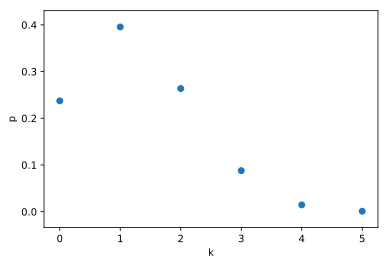

In [20]:
plt.scatter(x, y)
plt.xlabel('k')
plt.ylabel('p')
plt.show()


##### M(X) = M[sum(xk  |  k = 1..5)] = sum(M[xk] |  k = 1..5) = 5 * p = 1.25  - аналитический расчет

In [23]:
y @ np.array([0, 1, 2, 3, 4, 5])   # проверка прямым расчетом по распределению

1.25

##### D(X) = D[sum(xk | k = 1..5)] = sum(D[xk] | k = 1..5) = 5 * p * q= 5 * 1/4 * 3/4 = 15/16 = 0.9375 (в силу независимости xk дисперсия суммы равна сумме дисперсий)

In [27]:
y @ (np.array([0, 1, 2, 3, 4, 5]) - 1.25)**2  # проверка прямым расчетом по распределению

0.9375

### Задача 2

#### Вероятность попадания в цель при одном выстреле равна 0.01. Какова вероятность того, что число попаданий при 200 выстрелах будет не менее 5 и не более 10?

##### Используем приближение биномиального распределения при помощи распределения Пуассона для малой вероятности успеха:
##### binom(N, k) * p^k * q^(N-k) = lambda^k * e^(-lambda)  / k!, где lambda = N * p

In [28]:
lambd = 200 * 0.01

In [47]:
p_poisson = [lambd**k * np.exp(-lambd) / np.math.factorial(k) for k in range(5, 11)]
p_poisson

[0.03608940886309672,
 0.012029802954365574,
 0.0034370865583901638,
 0.0008592716395975409,
 0.00019094925324389798,
 3.8189850648779595e-05]

In [48]:
p_binom = [binom(200, k) * 0.01**k * 0.99**(200 - k) for k in range(5, 11)] # проверочка
p_binom

[0.03572335672160829,
 0.011727364580325954,
 0.0032829851783307863,
 0.0008000203780528306,
 0.000172394963620812,
 3.3260038435934425e-05]

In [50]:
# Искомая вероятность (для сравнения расчет двумя способами)
sum(p_poisson), sum(p_binom)

(0.052644709119342686, 0.051739381860374606)

### Задача 3

#### В условиях предыдущей задачи сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 10 раз будет совершено попадание? Подсказка. Как посчитать P(X >= k) для величины X, имеющей распределение Пуассона? Здесь предстоит немножко покодить.

In [54]:
def Prob(N, p):
    # считаем искомую вероятность в приближении Пуассона
    lmb = N * p
    return 1 - sum([lmb**k * np.exp(-lmb) / np.math.factorial(k) for k in range(10)])

In [63]:
def Prob09(N):
    # составим функцию для оптимизации
    return Prob(N, 0.01) - 0.9

In [64]:
from scipy.optimize import fsolve

In [65]:
fsolve(Prob09, 500)

array([1420.59902922])

In [67]:
Prob(1421, 0.01)

0.9001760722984115

#### Ответ: 1421 раз